In [23]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

In [2]:
def linear_function():
    """
    Implements a linear function: 
            Initializes X to be a random tensor of shape (3,1)
            Initializes W to be a random tensor of shape (4,3)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    X = tf.constant(np.random.randn(3,1), name = "X")
    W = tf.constant(np.random.randn(4,3), name = "W")
    b = tf.constant(np.random.randn(4,1), name = "b")
    Y = tf.add(tf.matmul(W,X),b)
    
    return Y.numpy()

In [4]:
def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """

    x = tf.Variable(z,dtype = tf.float32,name = 'x')
    sigmoid = tf.sigmoid(x)
    
    return sigmoid.numpy()

In [5]:
def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    z = tf.Variable(tf.zeros(logits.shape),tf.float32)
    y = tf.Variable(tf.zeros(labels.shape),tf.float32)
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z,  labels = y)
    return cost.numpy()

In [6]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 5


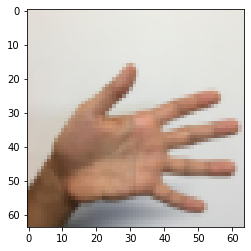

In [7]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [8]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [9]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    W1 = tf.Variable(name = "W1", shape =[25,12288],
                     initial_value = tf.keras.initializers.glorot_normal(seed=1)(shape =(25,12288)))
    b1 = tf.Variable(tf.zeros([25, 1]),name='b1')
    
    W2 = tf.Variable(name = "W2", shape =[12,25], 
                     initial_value = tf.keras.initializers.glorot_normal(seed=1)(shape =(12,25)))
    b2 = tf.Variable(tf.zeros([12, 1]),name='b2')
    
    W3 = tf.Variable(name = "W3", shape =[6,12], 
                     initial_value = tf.keras.initializers.glorot_normal(seed=1)(shape =(6,12)))
    b3 = tf.Variable(tf.zeros([6, 1]),name='b3')

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [10]:
parameters = initialize_parameters()

In [11]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
                                                        
    Z1 = tf.add(tf.matmul(W1,X),b1)                     
    A1 = tf.nn.relu(Z1)                                 
    Z2 = tf.add(tf.matmul(W2,A1),b2)                    
    A2 = tf.nn.relu(Z2)                                 
    Z3 = tf.add(tf.matmul(W3,A2),b3)                    
    
    return Z3

In [12]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)    
    cost =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits,labels = labels))
    
    return cost

In [13]:
def cost_Adami(inputs,targets,parameters):
    with tf.GradientTape() as t:
        Z3 = forward_propagation(inputs, parameters)
        cost = compute_cost(Z3, targets)
    return [t.gradient(cost, list(parameters.values())),cost]

In [14]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    parameters = initialize_parameters()
    optimizer = tf.optimizers.Adam(learning_rate = learning_rate)

    for epoch in range(num_epochs):
        epoch_cost = 0.                      
        num_minibatches = int(m / minibatch_size)
        seed = seed + 1
        minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
        
        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            X=minibatch_X.astype(np.float32)
            Y=minibatch_Y.astype(np.float32)
            grads, minibatch_cost = cost_Adami(X,Y,parameters)
            optimizer.apply_gradients(zip(grads, list(parameters.values())))
            epoch_cost += minibatch_cost / minibatch_size

        if print_cost == True and epoch % 100 == 0:
            print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
        if print_cost == True and epoch % 5 == 0:
            costs.append(epoch_cost)
                
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per fives)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters

Cost after epoch 0: 1.917844
Cost after epoch 100: 1.058197
Cost after epoch 200: 0.879497
Cost after epoch 300: 0.753173
Cost after epoch 400: 0.660200
Cost after epoch 500: 0.566796
Cost after epoch 600: 0.515669
Cost after epoch 700: 0.420315
Cost after epoch 800: 0.365563
Cost after epoch 900: 0.318442
Cost after epoch 1000: 0.268915
Cost after epoch 1100: 0.220944
Cost after epoch 1200: 0.193732
Cost after epoch 1300: 0.151077
Cost after epoch 1400: 0.120780


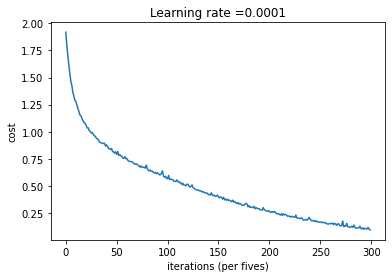

In [15]:
parameters = model(X_train, Y_train, X_test, Y_test)

In [36]:
correct_prediction = tf.equal(tf.argmax(forward_propagation(X_train, parameters)), tf.argmax(Y_train))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [37]:
print('Train Accuracy : {}'.format(accuracy.numpy()))

Train Accuracy : 0.9907407164573669


In [38]:
correct_prediction = tf.equal(tf.argmax(forward_propagation(X_test, parameters)), tf.argmax(Y_test))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print('Test Accuracy : {}'.format(accuracy.numpy()))

Test Accuracy : 0.7250000238418579


F:\Electrical\4 Communications\Handasa\Graduation Project\3.6.8\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
F:\Electrical\4 Communications\Handasa\Graduation Project\3.6.8\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


Your algorithm predicts: y = 1


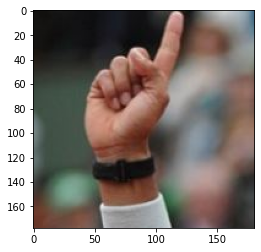

In [39]:
import scipy
from PIL import Image
from scipy import ndimage

my_image = "test.jpg"
fname = my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
#my_image_prediction = predict(my_image, parameters)
prediction = tf.argmax(forward_propagation(my_image, parameters))

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(prediction)))